# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 09 ноября 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***
$$ w_{new}=w_{old}-\alpha \nabla _{w}L\left( \omega _{old}\right) $$
$$ \nabla _{w}L\left( w_{old}\right) =\dfrac{1}{N} \sum ^{N}_{i=1}\nabla _{w}L\left( w_{old},x_{i},y_{i}\right) $$
$$ \nabla _{w}L\left( w_{old},x_{i},y_{i}\right) = 2(x_{i} ⋅ w_{old} − y_{i} )x_{i} $$
Итоговая формула: 
$$ w_{new}=w_{old}-\alpha \dfrac{2}{N} \sum ^{N}_{i=1}(x_{i} ⋅ w_{old} − y_{i} )x_{i} - \dfrac{2 \alpha w_{old}}{C}$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$ a_{i}=\sigma \left( \langle w_{old},x_{i}\rangle \right) $$
$$ \nabla L\left( w_{old},x_{i},y_{i}\right) = \dfrac{y_{i}\sigma ^{'}\left( \left( w_{old} ,x_{i}\right) \right) }{\sigma \left( \left( w_{old} ,x_{i}\right) \right) }+\dfrac{\left( 1-y_{i}\right) \left( 1-\sigma \left( \left( w_{old} ,x_{i}\right) \right) \right) ^{'}}{1-\sigma \left( \left( w_{old},x_{i}\right) \right) } $$
$$\sigma ^{'}=\sigma -\sigma ^{2}$$
Итоговая формула: 
$$ w_{new}=w_{old}+\dfrac{\alpha }{N}\sum ^{N}_{i=1}\left( y_{i}-a_{i}\right) x_{i} - \dfrac{2 \alpha w_{old}}{C}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

найдем точное решение
$$ \begin{aligned}\dfrac{1}{N}\left\| Xw-y\right\| ^{2}+\dfrac{\left\| w\right\| ^{2}}{C}=\\ =
\dfrac{1}{N}\left( Xw-y\right) ^{T}\left( Xw-y\right) +\dfrac{1}{C}w^{T}w=\\ =\dfrac{1}{N}\left( w^{T}X^{T}X\omega -w^{T}X^{T}y-y^{T}Xw+y^{T}y\right) +\dfrac{w^{T}w}{C}\end{aligned} $$

$$ \nabla _{a}L\left( w\right) =\dfrac{1}{N}w\left( X^{T}X+\left( X^{T}X\right) ^{T}\right) -\dfrac{2}{N}X^{T}y+\dfrac{1}{C}\left( E^{T}+E\right) w $$

$$ \begin{aligned}\dfrac{1}{N}\left( W\left( X^{T}X + \left( X^{T}X\right) ^{T}+\dfrac{N}{C}E^{T}+\dfrac{N}{C}E\right) -2X^{T}y\right) \end{aligned} $$

$$ \begin{aligned} \dfrac{1}{N}\left( w(2X^{T}X+\dfrac{NE}{C}\right) -2X^{T}y) =0\\ \left( X^{T}X+\dfrac{NE}{C}\right) W=X^{T}y\end{aligned} $$

Гессиан посчитать не успел(

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Мы добавляли во все вектора из Х дополнительную фичу, которая всегда равна 1, я считаю, что w0 надо использовать в регуляризации, т.к. это то же самое, если бы и у нас не было w0, но у всех векторов была бы фича, равная 1

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [2]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [3]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
import numpy as np

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    n = len(y)
    if (shuffle == True):
        A = np.concatenate((y.reshape(-1,1), X), axis = 1)
        X = A[:, 1:]
        y = A[:, [0]]
        
    for i in range(0, n, batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield (X_batch, y_batch)

        
# Теперь можно сделать генератор по данным ()
X = np.array([[1,2,3],[1,3,2],[2,2,2]])
y = np.array([1,2,0])
my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)
for batch_num, new_batch in enumerate(my_batch_generator):
        print(batch_num, new_batch[0], new_batch[1], sep = ' | ')

0 | [[1 2 3]] | [[1]]
1 | [[1 3 2]] | [[2]]
2 | [[2 2 2]] | [[0]]


In [3]:
#%%pycodestyle
from math import log
from math import exp
import numpy as np


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1 + exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', Ca = 1, batch_size = 1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.Ca = Ca
        self.batch_size = batch_size
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = len(y_batch)
        loss = 0
        Rw = np.dot(self.weights, self.weights)
        if (self.model_type == 'lin_reg'):
            for i in range(n):
                loss += (y_batch[i] - np.dot(self.weights,X_batch[i]))**2
            loss *= 1/n
            loss += Rw/self.C
            #loss = np.sum((y - np.dot(X, self.weights))**2)/n + Rw/self.C
        else:
            for i in range(n):
                ai = sigmoid(np.dot(self.weights, X_batch[i]))
                loss += (y_batch[i]*log(ai) + (1-y_batch[i])*log(1-ai))
            loss *= (-1/n)
            loss += Rw/self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = len(X_batch[0])
        m = len(y_batch)
        loss_grad = np.zeros(n)
        if (self.model_type == 'lin_reg'):
            for i in range(n):
                loss_grad[i] = 2*self.weights[i] / self.C
                for j in range(m):
                    loss_grad[i] += (np.dot(X_batch[j], self.weights)-y_batch[j])*X_batch[j][i]
                loss_grad[i] *= (2/m)    
        else:
            for i in range(n):
                loss_grad[i] = 2*self.weights[i] / self.C
                for j in range(m):
                    ai = sigmoid(np.dot(self.weights, X_batch[j]))
                    loss_grad[i] -= (y_batch[j] - ai)*X_batch[j][i]   
                loss_grad[i] *= 1/m
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha*new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.random_sample((len(X[0])+1,))
        for n in range(0, self.max_epoch):
            new_epoch_generator = batch_generator(X, y, self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                column = np.array([1]*len(y_batch))
                X_batch = np.concatenate((column.reshape(-1,1), X_batch), axis = 1)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
            self.alpha *= self.Ca
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        #y_hat = np.dot(X, self.weights)
        y_hat = np.dot(X, self.weights[1:])
        if (self.model_type == 'log_reg'):
            for i in range(len(y_hat)):
                if (y_hat[i] >= 0):
                    y_hat[i] = 1
                else:
                    y_hat[i] = 0
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
import matplotlib.pyplot as plt
def plot_decision_boundary(clf):
    def line(x):
        return -(clf.weights[1]*x - clf.weights[0])/clf.weights[2]
    if (clf.model_type == 'lin_reg'):
        plt.plot([-5,8], [line(-5), line(8)], color='red')
    else:
        plt.plot([-5,8], [line(-5), line(8)], color='blue')

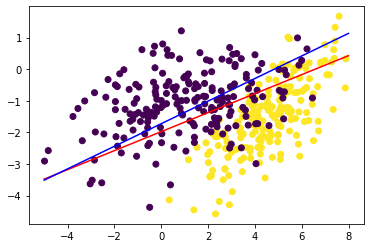

In [5]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
#y = np.r_[np.ones(200), np.zeros(200)]
y = np.r_[np.ones(200), -np.ones(200)]

clf = MySGDClassifier(batch_generator, alpha = 0.009, C = 4, max_epoch = 100, model_type='lin_reg', Ca = 0.0006)
clf.fit(X,y)
plot_decision_boundary(clf)

clf = MySGDClassifier(batch_generator, alpha = 0.05, C = 40, max_epoch = 100, model_type='log_reg', Ca = 0.99)
clf.fit(X,y)
plot_decision_boundary(clf)


plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [16]:
from sklearn.datasets import make_classification

In [17]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

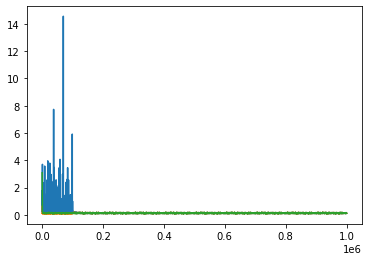

In [18]:
a = [0.05, 0.005, 0.0005]
for i in range(3):
    clf = MySGDClassifier(batch_generator, alpha = a[i], C = 4, max_epoch = 10, 
                                model_type='lin_reg', Ca = 0.0006, batch_size = 100)
    clf.fit(X,y)
    arg = []
    zn = []
    N = 100
    m = len(clf.errors_log['loss'])
    for j in range(0, m, N):
        arg.append(j+N/2)
        zn.append(np.mean(clf.errors_log['loss'][j: j+N]))
    plt.plot(arg, zn)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

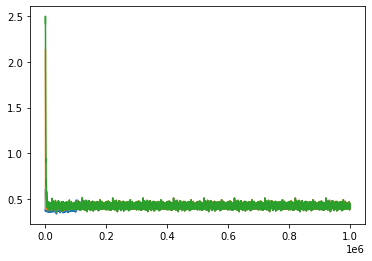

In [19]:
a = [0.05, 0.005, 0.0005]
for i in range(3):
    clf = MySGDClassifier(batch_generator, alpha = a[i], C = 4, max_epoch = 10, 
                                model_type='log_reg', Ca = 0.0006, batch_size = 100)
    clf.fit(X,y)
    arg = []
    zn = []
    N = 100
    m = len(clf.errors_log['loss'])
    for j in range(0, m, N):
        arg.append(j+N/2)
        zn.append(np.mean(clf.errors_log['loss'][j: j+N]))
    plt.plot(arg, zn)

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

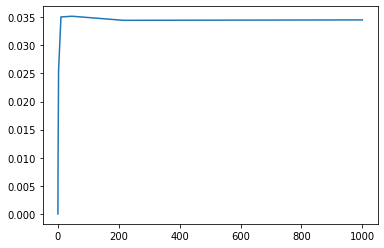

In [28]:
coefs = np.logspace(3, -3, 10)
zn = []
for i in range(len(coefs)):
    clf = MySGDClassifier(batch_generator, alpha = 0.00009, C = coefs[i], max_epoch = 10, model_type='lin_reg', Ca = 0.0006, batch_size = 100)
    clf.fit(X,y)
    zn.append(np.mean(clf.weights))
plt.plot(coefs, zn)

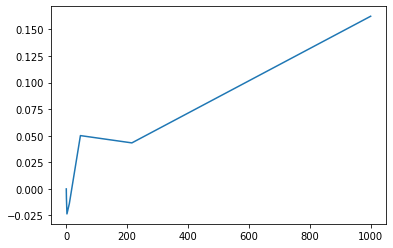

In [29]:
coefs = np.logspace(3, -3, 10)
zn = []
for i in range(len(coefs)):
    clf = MySGDClassifier(batch_generator, alpha = 0.00009, C = coefs[i], max_epoch = 10, model_type='log_reg', Ca = 0.0006, batch_size = 100)
    clf.fit(X,y)
    zn.append(np.mean(clf.weights))
plt.plot(coefs, zn)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('./train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
import re
import pymorphy2 as pym2

# функция для проверки соответствия слова какой-либо информативной единице
def pass_pattern(s):
    x = re.findall(r'[a-zа-я0-9]*\b', s)
    if x:
        return x[0] == s
    return False

y_train = []
X_train = []
groups_train = []
words_list = {}

#используем морфологический анализатор
MAnalyzer = pym2.MorphAnalyzer()

# множество словарь слов с их количеством в тектсе
multi_map = {}

# идем по всем группам и считаем сколько каких слов встречается во всех заголовках
# данные слова должны быть приведены к нормальной форме
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        words = set([MAnalyzer.normal_forms(x.lower().strip('.,?:!-()";*"'))[0]
                     if pass_pattern(x.lower().strip('.,?:!()";*"')) else ''
                     for x in title.strip().split()])
        if '' in words:
            words.remove('')
        words_list[doc_id] = words.copy()
        for x in words:
            if not x in multi_map:
                multi_map[x] = 1
            else:
                multi_map[x] += 1

# выбираем количество наиболее часто встречающихся слов, которые не являются информативными единицами
# выводим наиболее часто встречающиеся слова в выборке тайтлов
MAX_SPEC_WORDS = 11
popular_words_lst = list(multi_map.items())
popular_words_lst.sort(key=lambda x: x[1], reverse=True)
#print(*popular_words_lst[:3 * MAX_SPEC_WORDS], sep='\n')

# добавляем еще несколько неинформативных единиц, которые не являются достаточно популярными, 
# чтобы попасть в топ-MAX_SPEC_WORDS
spec_words = {'о', 'из'}
for i in popular_words_lst[:MAX_SPEC_WORDS]:
    spec_words.add(i[0])
#print(spec_words)

#print('popular -- ok')

max_features = 30 # количество фичей для каждого тайтла в обучающей выборке
cnt = 1           # номер текущей группы 
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        groups_train.append(new_group)
        all_dist = []
        # приводим слова к нормальной форме и помещаем их в сет
        words = words_list[doc_id].copy()
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            # приводим слова к нормальной форме и помещаем их в сет
            words_j = words_list[doc_id_j].copy()
            all_dist.append(len(words.intersection(words_j)))
        # если количество фичей недостаточно большое, то добавляем фиктивные (запонляем их нулями) 
        if len(all_dist) < max_features:
            all_dist.extend([0] * (max_features - len(all_dist)))
        X_train.append(sorted(all_dist, reverse=True)[0:max_features])
        y_train.append(target_id)
    #print("{} -- ok".format(cnt))
    cnt += 1

X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 30) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [9]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [142]:
clf = MySGDClassifier(batch_generator, alpha = 0.9, C = 100, max_epoch = 1, model_type='lin_reg', Ca = 0.09, batch_size=15)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [143]:
X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

In [145]:
clf.fit(X_subtrain, y_subtrain)

MySGDClassifier(C=100, Ca=0.09, alpha=2.5418658283289986e-13,
                batch_generator=<function batch_generator at 0x7f28f92fa7a0>,
                batch_size=15, max_epoch=6)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [146]:
y_validation_predict = clf.predict(X_validation)
for i in range(len(y_validation_predict)):
    if (y_validation_predict[i] > 0.5):
        y_validation_predict[i] = 1
    else:
        y_validation_predict[i] = 0
y_validation_predict = np.array(y_validation_predict, dtype=int)
f1_score(y_validation, y_validation_predict)

0.540446506233691

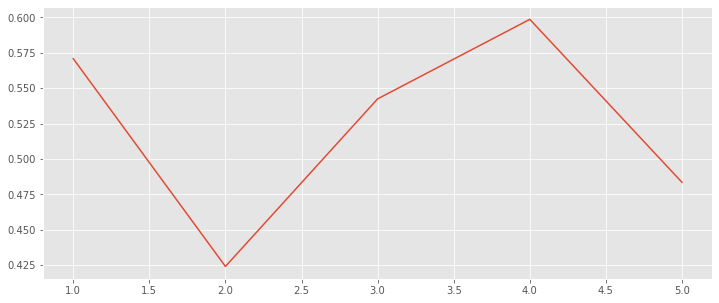

In [15]:
coefs = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
num = [1,2,3,4,5]
res = []
for coef in coefs:
    X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)
    clf = MySGDClassifier(batch_generator, alpha = coef, C = 100, max_epoch = 2, model_type='lin_reg', Ca = 0.009, batch_size=15)
    clf.fit(X_subtrain, y_subtrain)
    y_validation_predict = clf.predict(X_validation)
    for i in range(len(y_validation_predict)):
        if (y_validation_predict[i] > 0.5):
            y_validation_predict[i] = 1
        else:
            y_validation_predict[i] = 0
    y_validation_predict = np.array(y_validation_predict, dtype=int)
    res.append(f1_score(y_validation, y_validation_predict))
plt.plot(num, res)

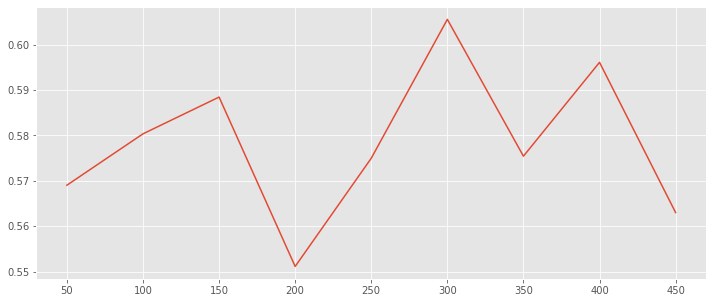

In [16]:
coefs = np.arange(50, 500, 50)
res = []
for coef in coefs:
    X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)
    clf = MySGDClassifier(batch_generator, alpha = 0.000001, C = coef, max_epoch = 2, model_type='lin_reg', Ca = 0.009, batch_size=15)
    clf.fit(X_subtrain, y_subtrain)
    y_validation_predict = clf.predict(X_validation)
    for i in range(len(y_validation_predict)):
        if (y_validation_predict[i] > 0.5):
            y_validation_predict[i] = 1
        else:
            y_validation_predict[i] = 0
    y_validation_predict = np.array(y_validation_predict, dtype=int)
    res.append(f1_score(y_validation, y_validation_predict))
plt.plot(coefs, res)

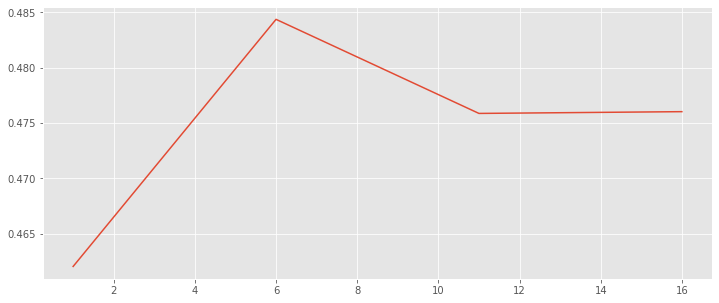

In [17]:
coefs = np.arange(1, 20, 5)
res = []
for coef in coefs:
    X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)
    clf = MySGDClassifier(batch_generator, alpha = 0.000001, C = 300, max_epoch = coef, model_type='lin_reg', Ca = 0.009, batch_size=15)
    clf.fit(X_subtrain, y_subtrain)
    y_validation_predict = clf.predict(X_validation)
    for i in range(len(y_validation_predict)):
        if (y_validation_predict[i] > 0.5):
            y_validation_predict[i] = 1
        else:
            y_validation_predict[i] = 0
    y_validation_predict = np.array(y_validation_predict, dtype=int)
    res.append(f1_score(y_validation, y_validation_predict))
plt.plot(coefs, res)

In [18]:
clf = MySGDClassifier(batch_generator, alpha = 0.000001, C = 300, max_epoch = 6, model_type='lin_reg', Ca = 0.09, batch_size = 15)
X_subtrain, X_validation, y_subtrain, y_validation = train_test_split(X_train, y_train, test_size = 0.3)

In [19]:
clf.fit(X_subtrain, y_subtrain)

MySGDClassifier(C=300, Ca=0.09, alpha=5.314409999999999e-13,
                batch_generator=<function batch_generator at 0x7fee690f87a0>,
                batch_size=15, max_epoch=6)

In [20]:
y_validation_predict = clf.predict(X_validation)
for i in range(len(y_validation_predict)):
    if (y_validation_predict[i] > 0.4):
        y_validation_predict[i] = 1
    else:
        y_validation_predict[i] = 0
y_validation_predict = np.array(y_validation_predict, dtype=int)
f1_score(y_validation, y_validation_predict)

0.6029346376167185

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

In [21]:
test_data = pd.read_csv('test_groups.csv')

testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

def pass_pattern(s):
    x = re.findall(r'[a-zа-я0-9]*\b', s)
    if x:
        return x[0] == s
    return False
    
# анализатор слов
MAnalyzer = pym2.MorphAnalyzer()

# множество словарь слов с их количеством в тектсе
multi_map = {}

words_list = {}

for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        words = set([MAnalyzer.normal_forms(x.lower().strip('.,?:!-()";*"'))[0]
                     if pass_pattern(x.lower().strip('.,?:!()";*"')) else ''
                     for x in title.strip().split()])
        if '' in words:
            words.remove('')
        words_list[doc_id] = words.copy()
        for x in words:
            if not x in multi_map:
                multi_map[x] = 1
            else:
                multi_map[x] += 1

# выбираем количество наиболее часто встречающихся слов, которые не являются информативными единицами
# выводим наиболее часто встречающиеся слова в выборке тайтлов
MAX_SPEC_WORDS = 11
popular_words_lst = list(multi_map.items())
popular_words_lst.sort(key=lambda x: x[1], reverse=True)

# добавляем еще несколько неинформативных единиц, которые не являются достаточно популярными, 
# чтобы попасть в топ-MAX_SPEC_WORDS
spec_words = {'от', 'из', 'к', 'за'}
for i in popular_words_lst[:MAX_SPEC_WORDS]:
    spec_words.add(i[0])

max_features = 30
X_test = []
groups_test = []
cnt = 1
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        # приводим слова к нормальной форме и помещаем их в сет
        words = words_list[doc_id].copy()
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = words_list[doc_id_j].copy()
            all_dist.append(len(words.intersection(words_j)))

        if len(all_dist) < max_features:
            all_dist.extend([0] * (max_features - len(all_dist)))
        X_test.append(sorted(all_dist, reverse=True)[0:max_features])
    cnt += 1
X_test = np.array(X_test)
groups_test = np.array(groups_test)

In [22]:
y_pred = clf.predict(X_test)

In [23]:
for i in range(len(y_pred)):
    if (y_pred[i] > 0.4):
        y_pred[i] = 1
    else:
        y_pred[i] = 0
y_pred = np.array(y_pred, dtype=int)

In [24]:
#добавляем столбец target
test_data['target'] = y_pred

#удаляем ненужные столбцы
test_data.drop(['group_id', 'doc_id'], axis='columns', inplace=True)

#сохраняем наш датафрейм в файл, который загружаем в kaggle
test_data.to_csv('result.csv', index=False)

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

rkaspr

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***